Original data link: [link](https://www.kaggle.com/datasets/maksbasher/ufc-complete-dataset-all-events-1996-2024?resource=download)

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import KFold

In [2]:
rawDF = pd.read_csv("large_dataset.csv")

rawDF.head()

,event_name,r_fighter,b_fighter,winner,weight_class,is_title_bout,gender,method,finish_round,total_rounds,...,weight_diff,reach_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
0,UFC Fight Night: Ribas vs. Namajunas,Amanda Ribas,Rose Namajunas,Blue,Women's Flyweight,0,Women,Decision - Unanimous,5,5.0,...,0.00,2.54,0.94,-0.11,-0.01,0.04,-0.02,0.26,0.2,0.69
1,UFC Fight Night: Ribas vs. Namajunas,Karl Williams,Justin Tafa,Red,Heavyweight,0,Men,Decision - Unanimous,3,3.0,...,-13.16,12.70,-1.22,-3.32,-0.02,0.50,0.13,0.50,0.2,4.75
2,UFC Fight Night: Ribas vs. Namajunas,Edmen Shahbazyan,AJ Dobson,Red,Middleweight,0,Men,KO/TKO,1,3.0,...,0.00,-2.54,-0.69,-1.22,0.06,-0.37,-0.01,-0.02,0.3,0.57
3,UFC Fight Night: Ribas vs. Namajunas,Payton Talbott,Cameron Saaiman,Red,Bantamweight,0,Men,KO/TKO,2,3.0,...,0.00,7.62,2.73,-0.60,0.08,-0.28,0.00,0.43,-0.2,-0.91
4,UFC Fight Night: Ribas vs. Namajunas,Billy Quarantillo,Youssef Zalal,Blue,Featherweight,0,Men,Submission,2,3.0,...,0.00,-5.08,4.48,3.84,0.07,-0.11,-0.22,0.01,-0.2,-1.04


In [3]:
rawDF.describe()

,is_title_bout,finish_round,total_rounds,time_sec,r_kd,r_sig_str,r_sig_str_att,r_sig_str_acc,r_str,r_str_att,...,weight_diff,reach_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
count,7439.000000,7439.000000,7408.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,...,7439.000000,6401.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000
mean,0.055787,2.336336,3.128915,227.016669,0.249227,38.361204,83.786262,0.475335,58.199892,106.374916,...,0.171000,0.190073,0.142594,-0.171643,0.012109,0.028164,0.020909,0.037513,0.045651,0.134487
std,0.229525,1.015243,0.652739,98.169665,0.524210,32.871278,71.381806,0.165935,46.057503,79.812210,...,6.774199,8.252628,1.585610,1.691358,0.119919,0.276307,0.113455,0.292107,1.052065,1.781598
min,0.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-258.550000,-27.940000,-8.990000,-39.490000,-0.700000,-1.000000,-0.580000,-1.000000,-15.100000,-11.770000
25%,0.000000,1.000000,3.000000,149.000000,0.000000,14.000000,29.000000,0.370000,22.000000,40.000000,...,0.000000,-5.080000,-0.860000,-1.040000,-0.060000,-0.130000,-0.040000,-0.140000,-0.400000,-0.870000
50%,0.000000,3.000000,3.000000,287.000000,0.000000,31.000000,66.000000,0.470000,50.000000,94.000000,...,0.000000,0.000000,0.130000,-0.120000,0.010000,0.020000,0.010000,0.020000,0.000000,0.090000
75%,0.000000,3.000000,3.000000,300.000000,0.000000,54.000000,120.000000,0.570000,83.000000,156.000000,...,0.000000,5.080000,1.160000,0.790000,0.080000,0.190000,0.080000,0.210000,0.500000,1.160000
max,1.000000,5.000000,5.000000,1080.000000,5.000000,445.000000,744.000000,1.000000,447.000000,746.000000,...,52.160000,33.020000,18.780000,12.640000,0.830000,1.000000,0.720000,1.000000,13.800000,11.110000


In [4]:
missingValues = rawDF.isna().sum()

colsWithMissing = missingValues[missingValues > 0]

print(colsWithMissing)

total_rounds      31
referee           32
r_age             76
r_reach          412
r_stance          26
b_age            190
b_reach          888
b_stance          68
age_diff         213
reach_diff      1038
dtype: int64


In [5]:
cleanedDF = rawDF.reset_index().drop(columns=["r_age","r_reach","r_stance","b_stance", "b_reach", "b_age", "age_diff", "reach_diff"])

cleanedDF.head()

,index,event_name,r_fighter,b_fighter,winner,weight_class,is_title_bout,gender,method,finish_round,...,height_diff,weight_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
0,0,UFC Fight Night: Ribas vs. Namajunas,Amanda Ribas,Rose Namajunas,Blue,Women's Flyweight,0,Women,Decision - Unanimous,5,...,-5.08,0.00,0.94,-0.11,-0.01,0.04,-0.02,0.26,0.2,0.69
1,1,UFC Fight Night: Ribas vs. Namajunas,Karl Williams,Justin Tafa,Red,Heavyweight,0,Men,Decision - Unanimous,3,...,7.62,-13.16,-1.22,-3.32,-0.02,0.50,0.13,0.50,0.2,4.75
2,2,UFC Fight Night: Ribas vs. Namajunas,Edmen Shahbazyan,AJ Dobson,Red,Middleweight,0,Men,KO/TKO,1,...,2.54,0.00,-0.69,-1.22,0.06,-0.37,-0.01,-0.02,0.3,0.57
3,3,UFC Fight Night: Ribas vs. Namajunas,Payton Talbott,Cameron Saaiman,Red,Bantamweight,0,Men,KO/TKO,2,...,5.08,0.00,2.73,-0.60,0.08,-0.28,0.00,0.43,-0.2,-0.91
4,4,UFC Fight Night: Ribas vs. Namajunas,Billy Quarantillo,Youssef Zalal,Blue,Featherweight,0,Men,Submission,2,...,0.00,0.00,4.48,3.84,0.07,-0.11,-0.22,0.01,-0.2,-1.04


In [6]:
from sklearn.impute import SimpleImputer

# impute a column
imputedDF = cleanedDF

imputer = SimpleImputer(strategy='mean')
imputedDF['total_rounds'] = imputer.fit_transform(imputedDF['total_rounds'].values.reshape(-1, 1) )

missingValues = imputedDF.isna().sum()

colsWithMissing = missingValues[missingValues > 0]

print(colsWithMissing)

referee    32
dtype: int64


In [7]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
encoder = OneHotEncoder(sparse=False)

#perform one-hot encoding on 'Country' column 
encodedData = encoder.fit_transform(imputedDF[['referee']])

encoder.categories_

c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['Adam Cheadle', 'Adam Martinez', 'Al Coley', 'Al Guinee',
        'Al Wichgers', 'Alan Abeles', 'Anders Ohlsson', 'Andrew Glenn',
        'Andy Social', 'Anthony Hamlett', 'Barry Gallant',
        'Bill Bookwalter', 'Bill Clancy', 'Bladimir Puga', 'Blake Grice',
        'Bo Nesslein', 'Bobby  Wombacher', 'Bobby Rehman', 'Brad Jardine',
        'Brandon Pfannenstiel', 'Brian Beauchamp', 'Bryan Miner',
        'Cameron Quinn', 'Camila Albuquerque', 'Cecil Peoples',
        'Chad Trukovich', 'Chip Snider', 'Chris Adams', 'Chris Kinman',
        'Chris Reed', 'Chris Tognoni', 'Cyril Desjardins', 'Dale Frye',
        'Dan Miragliotta', 'Dan Severn', 'Dan Stell', 'Daniel Movahedi',
        'Darryl Guthmiller', 'Dave Hagen', 'Dave Jobeun', 'Dave Seljestad',
        'David Ferguson', 'David Smith', 'Don Thais', 'Don Turnage',
        'Donnie Jessup', 'Dwayne Bess', 'Ed Collantes', 'Eduardo Herdy',
        'Elvis Bello', 'Eric McMahon', 'Eric Nevitt', 'Fernando Portella',
        'Ferna

In [8]:
def makeBarCount(myDF, colName, width, height):
    """This function generates a bar chart with the value count for all values of a given
       and dataframe

    Args:
        myDF (DataFrame): Dataframe of Data
        colName (String): Name of Column in DataFrame
        width (float): width of figure
        height (float): height of figure
    """
    plt.figure()
    myDF[colName].value_counts().plot(kind='bar', figsize=(width, height))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"Count of Entries In {colName} Column", y=1.02)

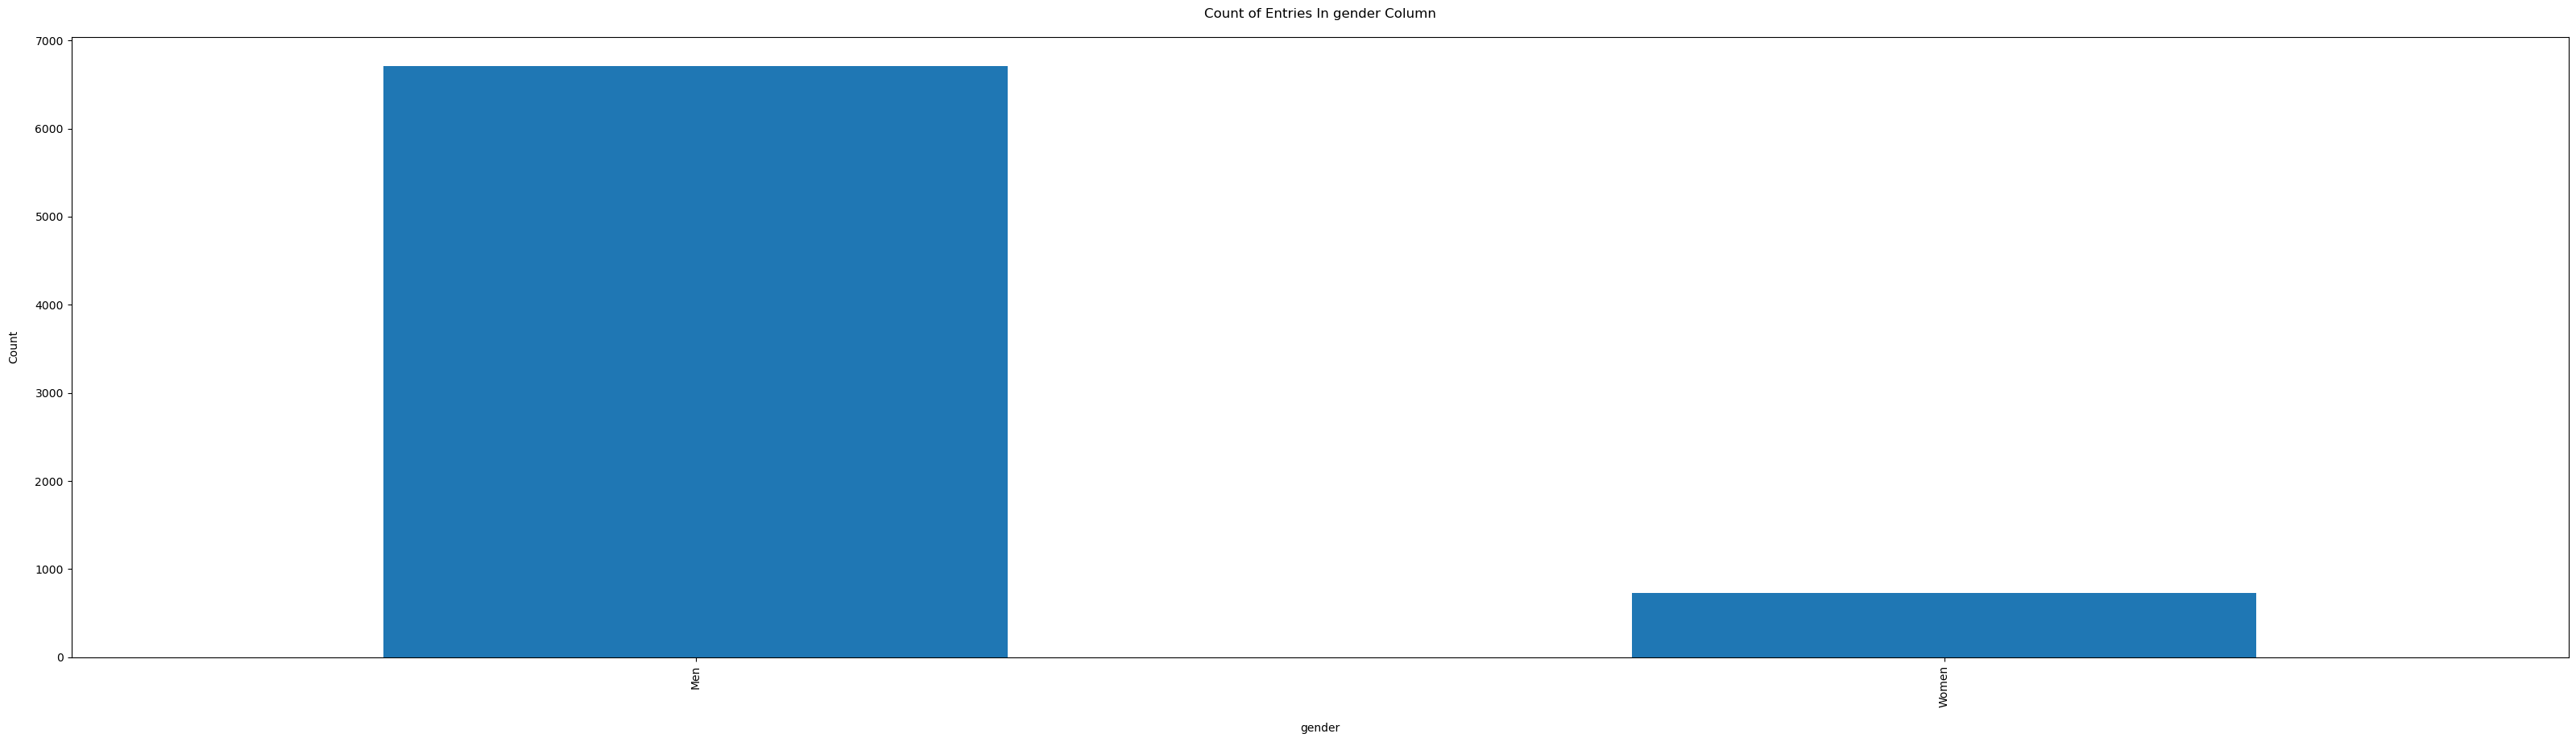

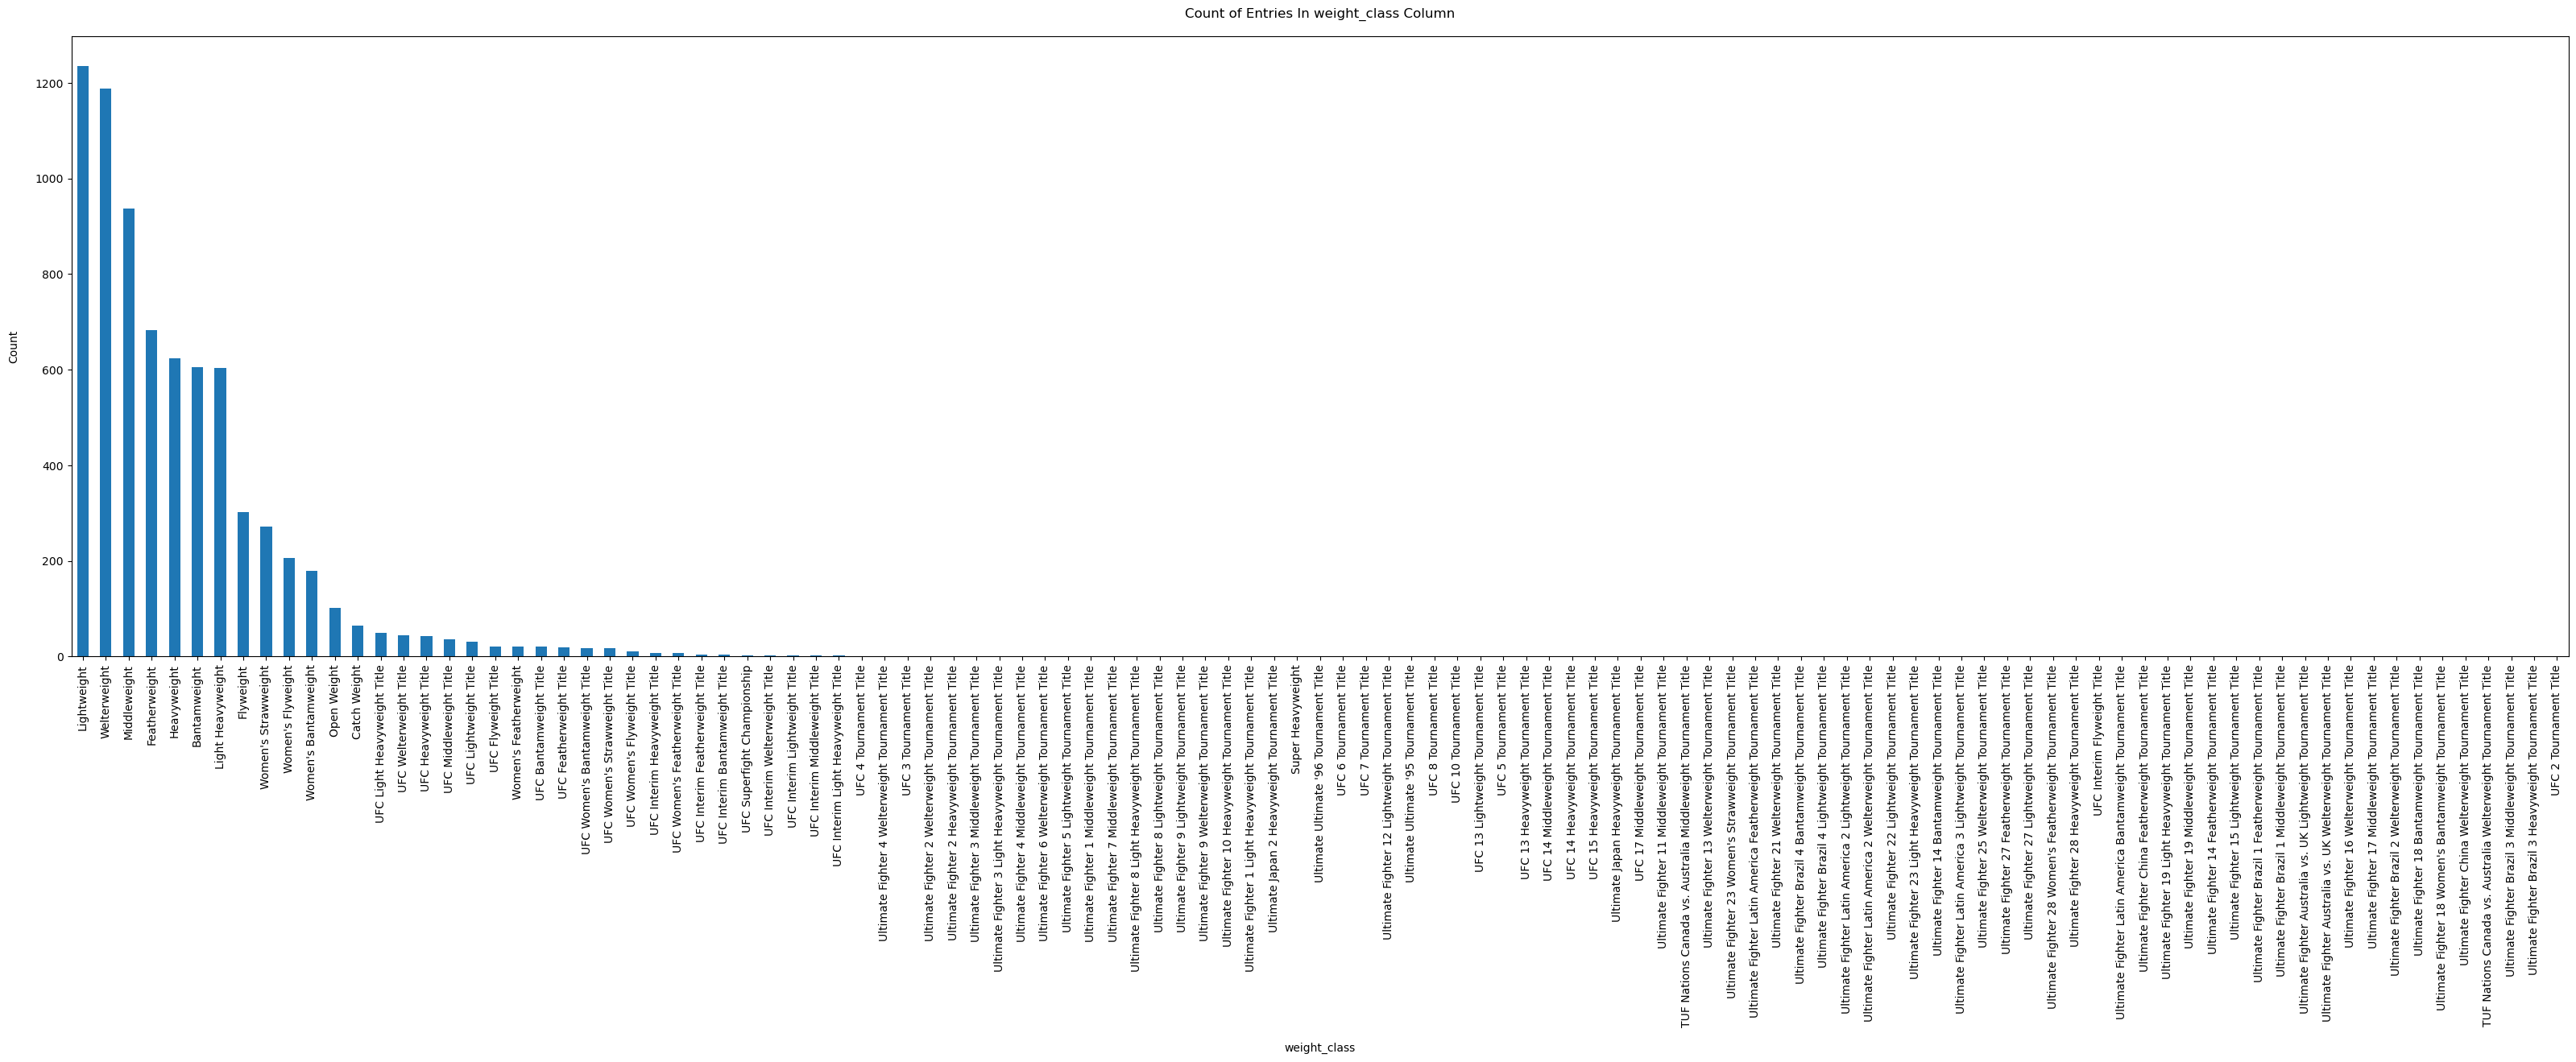

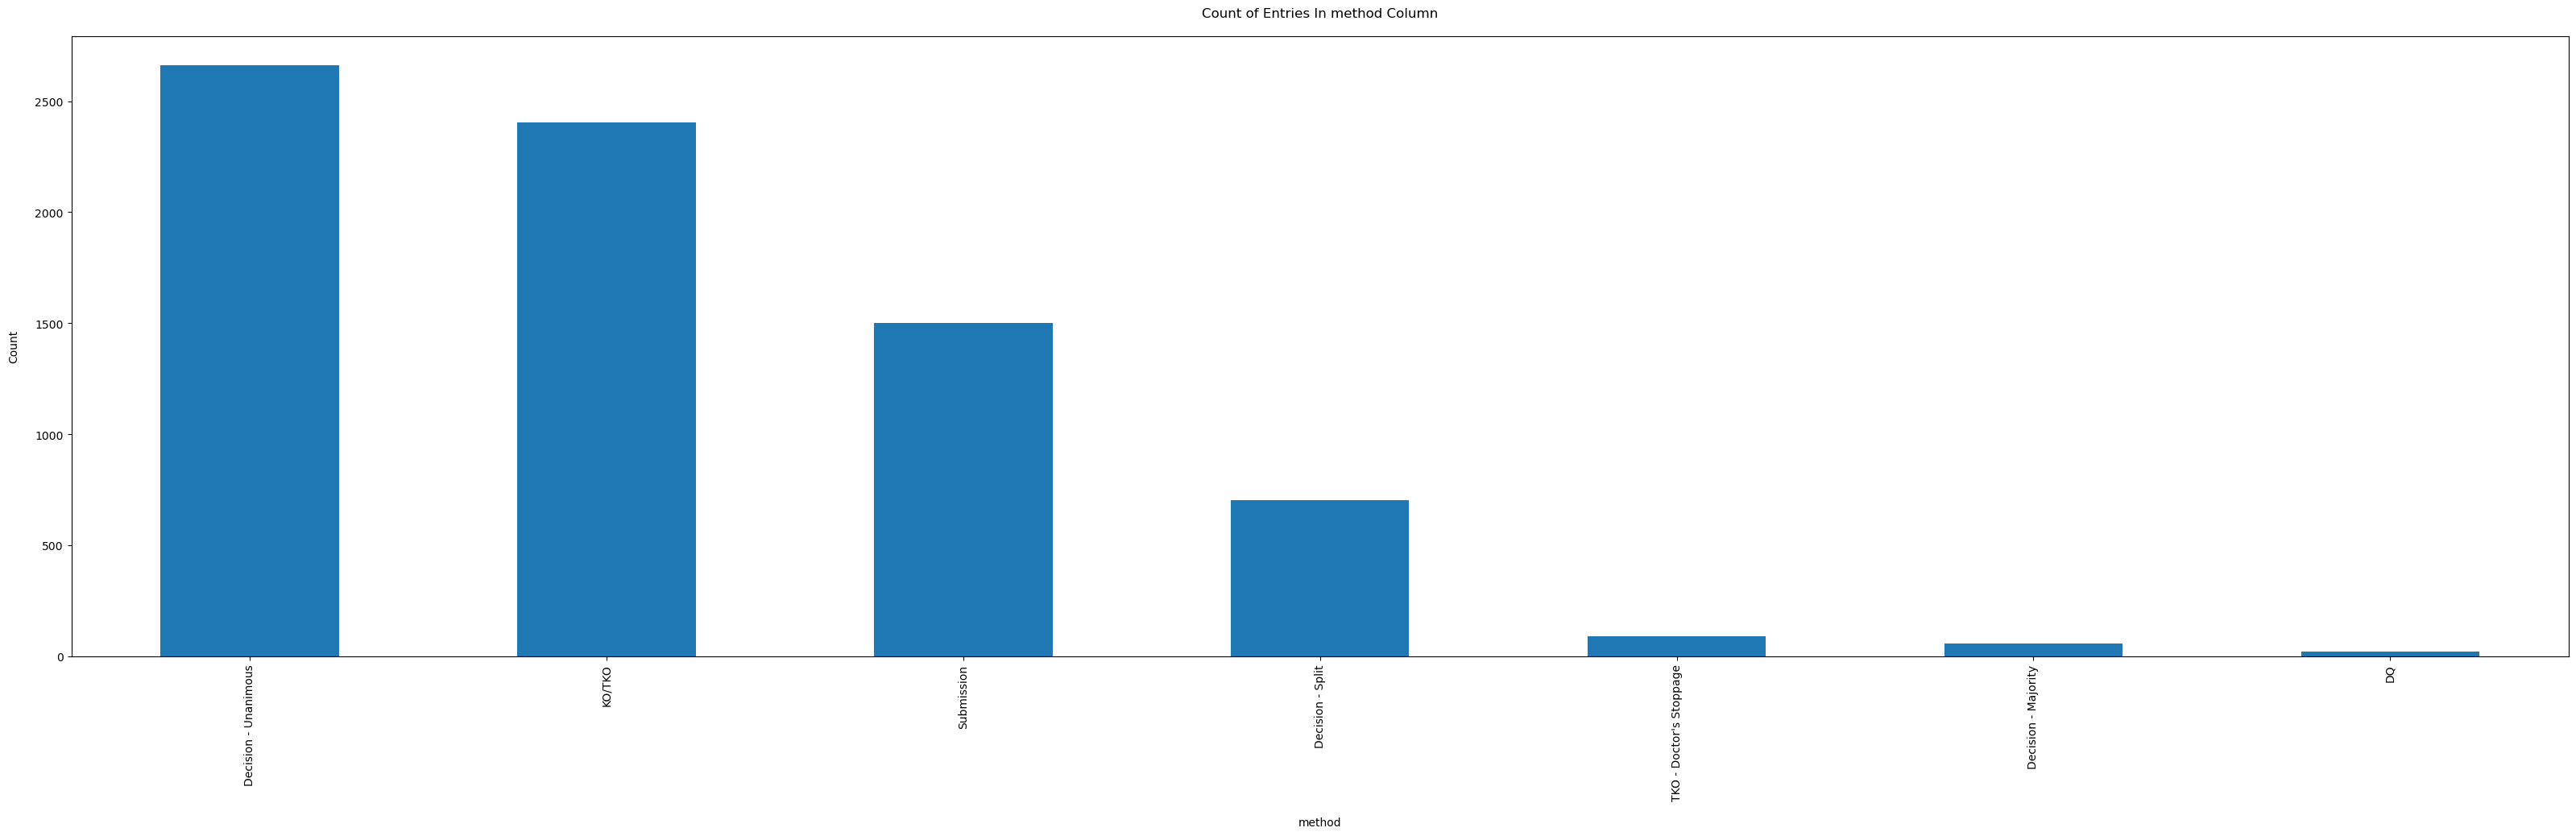

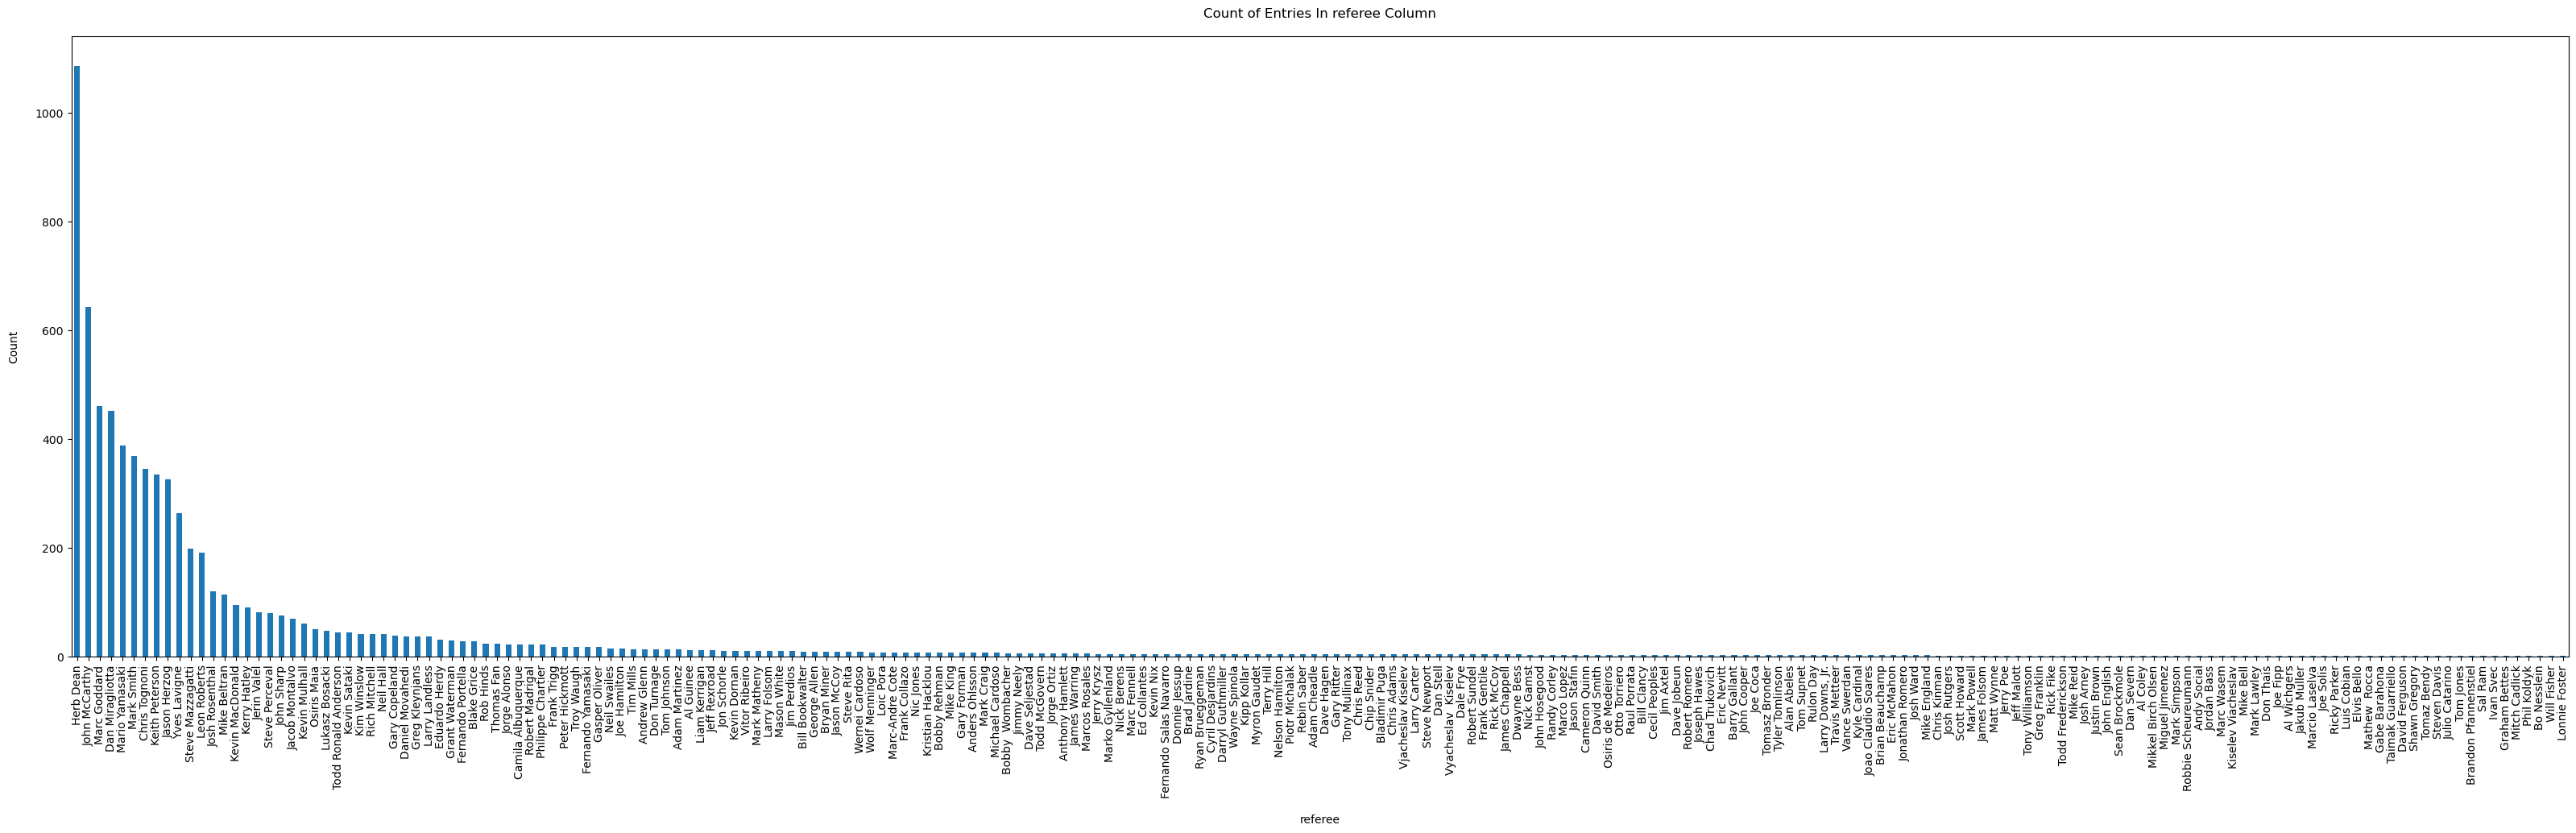

In [9]:
categoricalCols = ["gender", "weight_class", "method", "referee"]

for col in categoricalCols:
    makeBarCount(rawDF, col, 40, 10)

In [10]:
def getLabelList(n):
    labelList = []
    for i in range(n):
        labelList.append(i)
    return labelList

In [11]:
weightList = []
unique_weight_classes = imputedDF["weight_class"].unique()
for weight_class in unique_weight_classes:
    weightList.append(weight_class)

In [12]:
red_fighter_list = []
unique_red_fighter = imputedDF["r_fighter"].unique()
for red_fighter in unique_red_fighter:
    red_fighter_list.append(red_fighter)

In [13]:
blue_fighter_list = []
unique_blue_fighter = imputedDF["b_fighter"].unique()
for blue_fighter in unique_blue_fighter:
    blue_fighter_list.append(blue_fighter)

In [14]:
method_list = []
unique_method = imputedDF["method"].unique()
for method in unique_method:
    method_list.append(method)

In [15]:
referree_list = []
unique_ref = imputedDF["referee"].unique()
for ref in unique_ref:
    referree_list.append(ref)

In [16]:
winner_list = ["Red", "Blue"]
gender_list = ["Men", "Women"]

imputedDF["gender"] = imputedDF["gender"].replace(gender_list, getLabelList(len(gender_list)))
imputedDF["winner"] = imputedDF["winner"].replace(winner_list, getLabelList(len(winner_list)))
imputedDF["weight_class"] = imputedDF["weight_class"].replace(weightList, getLabelList(len(weightList)))
imputedDF["r_fighter"] = imputedDF["r_fighter"].replace(red_fighter_list, getLabelList(len(red_fighter_list)))
imputedDF["b_fighter"] = imputedDF["b_fighter"].replace(blue_fighter_list, getLabelList(len(blue_fighter_list)))
imputedDF["method"] = imputedDF["method"].replace(method_list, getLabelList(len(method_list)))
imputedDF["referee"] = imputedDF["referee"].replace(referree_list, getLabelList(len(referree_list)))

imputedDF.tail()

,index,event_name,r_fighter,b_fighter,winner,weight_class,is_title_bout,gender,method,finish_round,...,height_diff,weight_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
7434,7434,UFC 2: No Way Out,1793,2296,0,90,0,0,1,1,...,-10.16,-34.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7435,7435,UFC 2: No Way Out,1794,2297,0,90,0,0,2,1,...,-2.54,15.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7436,7436,UFC 2: No Way Out,1791,2298,0,90,0,0,1,1,...,-12.70,-29.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7437,7437,UFC 2: No Way Out,1782,2299,0,90,0,0,2,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7438,7438,UFC 2: No Way Out,1795,2300,0,90,0,0,2,1,...,-5.08,15.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# seperating the target column from the features
featureDF = imputedDF.reset_index().drop(columns="event_name")

yDF = pd.DataFrame(featureDF["winner"])

yDF.head()

,winner
0,1
1,0
2,0
3,0
4,1


In [18]:
xDF = featureDF.drop(columns="winner")

xDF.head()

,level_0,index,r_fighter,b_fighter,weight_class,is_title_bout,gender,method,finish_round,total_rounds,...,height_diff,weight_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
0,0,0,0,0,0,0,1,0,5,5.0,...,-5.08,0.00,0.94,-0.11,-0.01,0.04,-0.02,0.26,0.2,0.69
1,1,1,1,1,1,0,0,0,3,3.0,...,7.62,-13.16,-1.22,-3.32,-0.02,0.50,0.13,0.50,0.2,4.75
2,2,2,2,2,2,0,0,1,1,3.0,...,2.54,0.00,-0.69,-1.22,0.06,-0.37,-0.01,-0.02,0.3,0.57
3,3,3,3,3,3,0,0,1,2,3.0,...,5.08,0.00,2.73,-0.60,0.08,-0.28,0.00,0.43,-0.2,-0.91
4,4,4,4,4,4,0,0,2,2,3.0,...,0.00,0.00,4.48,3.84,0.07,-0.11,-0.22,0.01,-0.2,-1.04


In [19]:
print(xDF.shape)
print(yDF.shape)

(7439, 87)
(7439, 1)


In [20]:
# split training and testing set

xTrain, xTest, yTrain, yTest = train_test_split(xDF, 
                                                yDF,
                                                test_size = 0.3,
                                                shuffle=True)

xTrain.head()

,level_0,index,r_fighter,b_fighter,weight_class,is_title_bout,gender,method,finish_round,total_rounds,...,height_diff,weight_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
6841,6841,6841,891,1583,2,0,0,0,3,3.0,...,0.00,-6.80,-0.64,-0.85,-0.03,0.13,0.01,0.29,-0.4,1.54
2959,2959,2959,882,577,6,0,1,4,3,3.0,...,-5.08,4.54,-0.47,-2.29,0.20,0.21,-0.04,-0.50,0.2,1.26
2642,2642,2642,699,461,1,0,0,1,1,3.0,...,2.54,3.63,-4.54,-2.17,0.16,0.55,0.02,-0.02,0.8,1.42
1992,1992,1992,262,567,21,1,1,4,5,5.0,...,-5.08,0.00,-0.34,0.19,0.03,-0.20,-0.09,-0.14,0.3,2.02
4194,4194,4194,1108,1258,3,0,0,0,3,3.0,...,-2.54,0.00,0.87,0.54,-0.24,0.12,0.07,0.02,-0.8,-0.09


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(xTrain, yTrain)

testPreds = model.predict(xTest)
trainPreds = model.predict(xTrain)

trainR2 = r2_score(yTrain, trainPreds, average='weighted')
trainAccuracy = accuracy_score(yTrain, trainPreds, average='weighted')

testR2 = r2_score(yTest, testPreds, average='weighted')
testAccuracy = accuracy_score(yTest, testPreds, average='weighted')

print(f"Train R2 Score: {trainR2}")
print(f"Train Accuracy: {trainAccuracy}")

print('\n')

print(f"Test R2 Score: {testR2}")
print(f"Test Accuracy: {testAccuracy}")


Train Precision: 0.8475487949560495
Train Recall: 0.8492414057998847
Train F1 Score: 0.8477318651195601


Test Precision: 0.8364882954192098
Test Recall: 0.8382616487455197
Test F1 Score: 0.8370036193397866


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(xTrain, yTrain)

testPreds = model.predict(xTest)
trainPreds = model.predict(xTrain)

trainR2 = r2_score(yTrain, trainPreds, average='weighted')
trainAccuracy = accuracy_score(yTrain, trainPreds, average='weighted')

testR2 = r2_score(yTest, testPreds, average='weighted')
testAccuracy = accuracy_score(yTest, testPreds, average='weighted')

print(f"Train R2 Score: {trainR2}")
print(f"Train Accuracy: {trainAccuracy}")

print('\n')

print(f"Test R2 Score: {testR2}")
print(f"Test Accuracy: {testAccuracy}")

Train Precision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0


Test Precision: 0.8686380420316702
Test Recall: 0.867831541218638
Test F1 Score: 0.8681810804682365


In [23]:
from sklearn.svm import SVC

model = SVC().fit(xTrain, yTrain)

testPreds = model.predict(xTest)
trainPreds = model.predict(xTrain)

trainR2 = r2_score(yTrain, trainPreds, average='weighted')
trainAccuracy = accuracy_score(yTrain, trainPreds, average='weighted')

testR2 = r2_score(yTest, testPreds, average='weighted')
testAccuracy = accuracy_score(yTest, testPreds, average='weighted')

print(f"Train R2 Score: {trainR2}")
print(f"Train Accuracy: {trainAccuracy}")

print('\n')

print(f"Test R2 Score: {testR2}")
print(f"Test Accuracy: {testAccuracy}")


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.7958814567555158
Train Recall: 0.7977722296908009
Train F1 Score: 0.7890985099366766


Test Precision: 0.7974135571385136
Test Recall: 0.7970430107526881
Test F1 Score: 0.7850034284189913


In [24]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier().fit(xTrain, yTrain)

testPreds = model.predict(xTest)
trainPreds = model.predict(xTrain)

trainR2 = r2_score(yTrain, trainPreds, average='weighted')
trainAccuracy = accuracy_score(yTrain, trainPreds, average='weighted')

testR2 = r2_score(yTest, testPreds, average='weighted')
testAccuracy = accuracy_score(yTest, testPreds, average='weighted')

print(f"Train R2 Score: {trainR2}")
print(f"Train Accuracy: {trainAccuracy}")

print('\n')

print(f"Test R2 Score: {testR2}")
print(f"Test Accuracy: {testAccuracy}")


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Precision: 0.8654783953366235
Train Recall: 0.8490493566352987
Train F1 Score: 0.8386151155428125


Test Precision: 0.8468274465736166
Test Recall: 0.8360215053763441
Test F1 Score: 0.8249060945055262


In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(xTrain, yTrain)

testPreds = model.predict(xTest)
trainPreds = model.predict(xTrain)

trainR2 = r2_score(yTrain, trainPreds, average='weighted')
trainAccuracy = accuracy_score(yTrain, trainPreds, average='weighted')

testR2 = r2_score(yTest, testPreds, average='weighted')
testAccuracy = accuracy_score(yTest, testPreds, average='weighted')

print(f"Train R2 Score: {trainR2}")
print(f"Train Accuracy: {trainAccuracy}")

print('\n')

print(f"Test R2 Score: {testR2}")
print(f"Test Accuracy: {testAccuracy}")


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Precision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0


Test Precision: 0.8916114365334726
Test Recall: 0.8924731182795699
Test F1 Score: 0.8916566977422105


In [26]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(xTest, yTest)

testPreds = model.predict(xTest)
trainPreds = model.predict(xTrain)

trainR2 = r2_score(yTrain, trainPreds, average='weighted')
trainAccuracy = accuracy_score(yTrain, trainPreds, average='weighted')

testR2 = r2_score(yTest, testPreds, average='weighted')
testAccuracy = accuracy_score(yTest, testPreds, average='weighted')

print(f"Train R2 Score: {trainR2}")
print(f"Train Accuracy: {trainAccuracy}")

print('\n')

print(f"Test R2 Score: {testR2}")
print(f"Test Accuracy: {testAccuracy}")


Train Precision: 0.8504371711443339
Train Recall: 0.8317649318225466
Train F1 Score: 0.8350965688535947


Test Precision: 0.8376007230228764
Test Recall: 0.8091397849462365
Test F1 Score: 0.8137585713500726


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
from sklearn.preprocessing import StandardScaler

xScaler = StandardScaler()
xColNames = xTrain.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']}]
gridSearch = GridSearchCV(estimator = LogisticRegression(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

logisticParams = gridSearch.best_params_

logisticParams

c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

In [29]:
from sklearn.svm import SVC

# took too long to run

parameters = {'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001]}
gridSearch = GridSearchCV(estimator = SVC(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

svmParams = gridSearch.best_params_

svmParams

c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\User

KeyboardInterrupt: 

In [39]:
from sklearn.tree import DecisionTreeClassifier

parameters = {
              'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]}

gridSearch = GridSearchCV(estimator = DecisionTreeClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

treeParams = gridSearch.best_params_

treeParams

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}

In [40]:
from sklearn.neural_network import MLPClassifier

parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['adam', 'lbfgs', 'sgd']
}
gridSearch = GridSearchCV(estimator = MLPClassifier(),  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5,
                           verbose=0)


gridSearch.fit(xTrainScaled, yTrain) 

mlpParams = gridSearch.best_params_

mlpParams


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y 

{'activation': 'tanh', 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameters grid
parameters = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
gridSearch = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=parameters,
    scoring='recall',
    cv=5,
    verbose=0
)

# Fit the grid search to the data
gridSearch.fit(xTrainScaled, yTrain)

# Get the best parameters
randomParams = gridSearch.best_params_

randomParams

c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Define the parameters grid
parameters = {
    # GaussianNB doesn't have hyperparameters to tune
}

# Create the GridSearchCV object
gridSearch = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=parameters,
    scoring='recall',
    cv=5,
    verbose=0
)

# Fit the grid search to the data
gridSearch.fit(xTrainScaled, yTrain)

# Get the best parameters
nbParams = gridSearch.best_params_

For my machine learning models after the hyper parameter optimization I am only going to be using 4 because naive bayes has no hyper parameters and my support vector classifier never finished running to find the optimal params. 

In [38]:
from sklearn.linear_model import LogisticRegression

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
accuracy_scores = []

for i, (train_index, test_index) in enumerate(cv.split(xDF, yDF)):
    # print(train_index)
    train_index = train_index.tolist()
    test_index = test_index.tolist()

    xTrain, xTest = xDF.iloc[train_index], xDF.iloc[test_index]
    yTrain, yTest = yDF.iloc[train_index], yDF.iloc[test_index]

    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xTrain[xColNames])
    # apply the scaling to the testing set
    xTestScaled = xScaler.transform(xTest[xColNames])

    ### model training
    # instantiate the model
    clf = LogisticRegression(**logisticParams)
    # Train the classifier on the training data
    clf.fit(xTrain, yTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    y_pred = clf.predict(xTest)
    
    # Calculate metrics and store them
    r2 = r2_score(yTest, y_pred)
    r2_scores.append(r2)

    accuracy = accuracy_score(yTest, y_pred)
    accuracy_scores.append(accuracy)

    print(f"Completed Fold {i}")

### Calculate the mean scores across all folds
avgPrecision = sum(r2_scores) / len(r2_scores)
print("Average r squared score:", avgPrecision)

avgAccuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Average accuracy score:", avgAccuracy)

c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Completed Fold 0


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Completed Fold 1


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Completed Fold 2


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Completed Fold 3


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Completed Fold 4
Average r squared score: 0.46536339848033137
Average accuracy score: 0.8792848956186592


In [42]:
from sklearn.tree import DecisionTreeClassifier

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
accuracy_scores = []

for i, (train_index, test_index) in enumerate(cv.split(xDF, yDF)):
    # print(train_index)
    train_index = train_index.tolist()
    test_index = test_index.tolist()

    xTrain, xTest = xDF.iloc[train_index], xDF.iloc[test_index]
    yTrain, yTest = yDF.iloc[train_index], yDF.iloc[test_index]

    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xTrain[xColNames])
    # apply the scaling to the testing set
    xTestScaled = xScaler.transform(xTest[xColNames])

    ### model training
    # instantiate the model
    clf = DecisionTreeClassifier(**treeParams)
    # Train the classifier on the training data
    clf.fit(xTrain, yTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    y_pred = clf.predict(xTest)
    
    # Calculate metrics and store them
    r2 = r2_score(yTest, y_pred)
    r2_scores.append(r2)

    accuracy = accuracy_score(yTest, y_pred)
    accuracy_scores.append(accuracy)

    print(f"Completed Fold {i}")

### Calculate the mean scores across all folds
avgPrecision = sum(r2_scores) / len(r2_scores)
print("Average r squared score:", avgPrecision)

avgAccuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Average accuracy score:", avgAccuracy)

Completed Fold 0
Completed Fold 1
Completed Fold 2
Completed Fold 3
Completed Fold 4
Average r squared score: 0.47317613048072127
Average accuracy score: 0.8810332017267936


In [43]:
from sklearn.neural_network import MLPClassifier

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
accuracy_scores = []

for i, (train_index, test_index) in enumerate(cv.split(xDF, yDF)):
    # print(train_index)
    train_index = train_index.tolist()
    test_index = test_index.tolist()

    xTrain, xTest = xDF.iloc[train_index], xDF.iloc[test_index]
    yTrain, yTest = yDF.iloc[train_index], yDF.iloc[test_index]

    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xTrain[xColNames])
    # apply the scaling to the testing set
    xTestScaled = xScaler.transform(xTest[xColNames])

    ### model training
    # instantiate the model
    clf = MLPClassifier(**mlpParams)
    # Train the classifier on the training data
    clf.fit(xTrain, yTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    y_pred = clf.predict(xTest)
    
    # Calculate metrics and store them
    r2 = r2_score(yTest, y_pred)
    r2_scores.append(r2)

    accuracy = accuracy_score(yTest, y_pred)
    accuracy_scores.append(accuracy)

    print(f"Completed Fold {i}")

### Calculate the mean scores across all folds
avgPrecision = sum(r2_scores) / len(r2_scores)
print("Average r squared score:", avgPrecision)

avgAccuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Average accuracy score:", avgAccuracy)

c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Completed Fold 0


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Completed Fold 1


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Completed Fold 2


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Completed Fold 3


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Completed Fold 4
Average r squared score: -0.3641865668745887
Average accuracy score: 0.6920277711492433


In [44]:
from sklearn.ensemble import RandomForestClassifier

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
accuracy_scores = []

for i, (train_index, test_index) in enumerate(cv.split(xDF, yDF)):
    # print(train_index)
    train_index = train_index.tolist()
    test_index = test_index.tolist()

    xTrain, xTest = xDF.iloc[train_index], xDF.iloc[test_index]
    yTrain, yTest = yDF.iloc[train_index], yDF.iloc[test_index]

    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xTrain[xColNames])
    # apply the scaling to the testing set
    xTestScaled = xScaler.transform(xTest[xColNames])

    ### model training
    # instantiate the model
    clf = RandomForestClassifier(**randomParams)
    # Train the classifier on the training data
    clf.fit(xTrain, yTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    y_pred = clf.predict(xTest)
    
    # Calculate metrics and store them
    r2 = r2_score(yTest, y_pred)
    r2_scores.append(r2)

    accuracy = accuracy_score(yTest, y_pred)
    accuracy_scores.append(accuracy)

    print(f"Completed Fold {i}")

### Calculate the mean scores across all folds
avgPrecision = sum(r2_scores) / len(r2_scores)
print("Average r squared score:", avgPrecision)

avgAccuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Average accuracy score:", avgAccuracy)

c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Completed Fold 0


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Completed Fold 1


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Completed Fold 2


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Completed Fold 3


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Completed Fold 4
Average r squared score: 0.5563504207697999
Average accuracy score: 0.8998519426426883
